# 2.5 ANÁLISIS EXPLORATORIO DE DATOS (EDA)

En este notebook realizamos el **Análisis Exploratorio de Datos (EDA)** del dataset:

**`retail_sales_transformado.csv`**

El EDA es una de las etapas más importantes en la Ciencia de Datos, ya que permite:

- Entender la estructura general de los datos.
- Detectar patrones, tendencias y comportamientos relevantes.
- Identificar valores atípicos (outliers).
- Visualizar distribuciones de variables.
- Analizar correlaciones entre atributos.
- Obtener indicadores que apoyan decisiones de negocio.

Este análisis sigue la misma metodología vista en clase en el archivo:

**📘 EDA01.ipynb (Ejemplo del profesor)**  
Adaptado ahora al dataset de Retail Sales.


In [1]:
# Importar librerías principales
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración estética
plt.style.use('ggplot')
sns.set_theme(style="whitegrid")

# Cargar el dataset transformado
df = pd.read_csv("retail_sales_transformado.csv")

df.head()


,id_transaccion,fecha,id_cliente,genero,edad,categoria_producto,cantidad,precio_unitario,monto_total,anio,mes,dia,nombre_mes,rango_edad,monto_calculado,diferencia_monto,nivel_compra,es_compra_alta
0,1,2023-11-24,CUST001,MALE,34,Beauty,3,50,150,2023,11,24,November,Adulto,150,0,Baja,False
1,2,2023-02-27,CUST002,FEMALE,26,Clothing,2,500,1000,2023,2,27,February,Adulto,1000,0,Alta,True
2,3,2023-01-13,CUST003,MALE,50,Electronics,1,30,30,2023,1,13,January,Mayor,30,0,Baja,False
3,4,2023-05-21,CUST004,MALE,37,Clothing,1,500,500,2023,5,21,May,Adulto,500,0,Media,False
4,5,2023-05-06,CUST005,MALE,30,Beauty,2,50,100,2023,5,6,May,Adulto,100,0,Baja,False


## 1. Información general del dataset

Aquí revisamos:

- Cantidad de registros
- Columnas disponibles
- Tipos de datos
- Valores nulos
- Estructura general

Esto sigue exactamente el formato usado en clase para entender los datos antes de analizarlos.


In [2]:
# Dimensión del dataset
df.shape


(1000, 18)

In [3]:
# Información general
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   id_transaccion      1000 non-null   int64 
 1   fecha               1000 non-null   object
 2   id_cliente          1000 non-null   object
 3   genero              1000 non-null   object
 4   edad                1000 non-null   int64 
 5   categoria_producto  1000 non-null   object
 6   cantidad            1000 non-null   int64 
 7   precio_unitario     1000 non-null   int64 
 8   monto_total         1000 non-null   int64 
 9   anio                1000 non-null   int64 
 10  mes                 1000 non-null   int64 
 11  dia                 1000 non-null   int64 
 12  nombre_mes          1000 non-null   object
 13  rango_edad          1000 non-null   object
 14  monto_calculado     1000 non-null   int64 
 15  diferencia_monto    1000 non-null   int64 
 16  nivel_compra        1000 

In [4]:
# Conteo de valores nulos
df.isna().sum()


id_transaccion        0
fecha                 0
id_cliente            0
genero                0
edad                  0
categoria_producto    0
cantidad              0
precio_unitario       0
monto_total           0
anio                  0
mes                   0
dia                   0
nombre_mes            0
rango_edad            0
monto_calculado       0
diferencia_monto      0
nivel_compra          0
es_compra_alta        0
dtype: int64

## 2. Estadísticas descriptivas de variables numéricas

Aquí calculamos:

- Media
- Mediana
- Mínimo
- Máximo
- Desviación estándar

Tal como se realizó en el archivo EDA01.ipynb del profesor.


In [5]:
df[['edad', 'cantidad', 'precio_unitario', 'monto_total']].describe().round(2)


,edad,cantidad,precio_unitario,monto_total
count,1000.00,1000.00,1000.00,1000.0
mean,41.39,2.51,179.89,456.0
std,13.68,1.13,189.68,560.0
min,18.00,1.00,25.00,25.0
25%,29.00,1.00,30.00,60.0
50%,42.00,3.00,50.00,135.0
75%,53.00,4.00,300.00,900.0
max,64.00,4.00,500.00,2000.0


## 3. Distribución de variables numéricas (Histogramas)

Los histogramas permiten observar:

- Si la variable está sesgada.
- Concentración de valores.
- Presencia de valores extremos.

Esta parte replica la lógica del EDA del profesor.


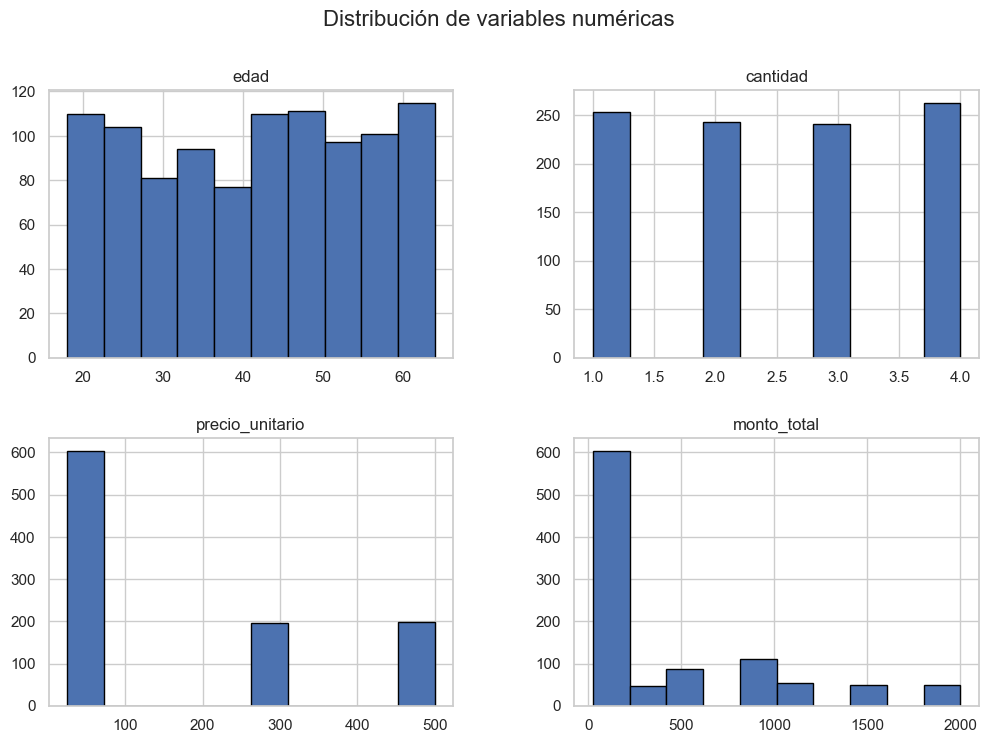

In [6]:
df[['edad', 'cantidad', 'precio_unitario', 'monto_total']].hist(
    figsize=(12,8),
    edgecolor='black'
)

plt.suptitle("Distribución de variables numéricas", fontsize=16)
plt.show()


## 4. Detección de Outliers con Boxplots

Los boxplots ayudan a visualizar valores extremos o desviaciones importantes.

En clase se aplicó este tipo de análisis para detectar outliers en datasets numéricos.


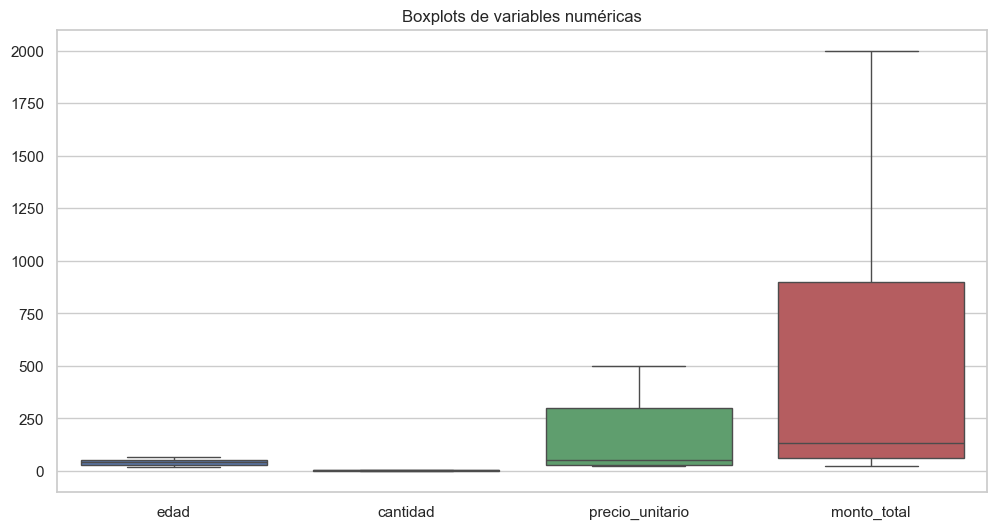

In [7]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df[['edad', 'cantidad', 'precio_unitario', 'monto_total']])
plt.title("Boxplots de variables numéricas")
plt.show()


## 5. Distribución de categorías de productos

Analizamos cuántas ventas pertenecen a cada categoría:  
Ideal para saber qué líneas de productos tienen mayor demanda.

Esto corresponde a la sección de análisis categórico vista en clase.


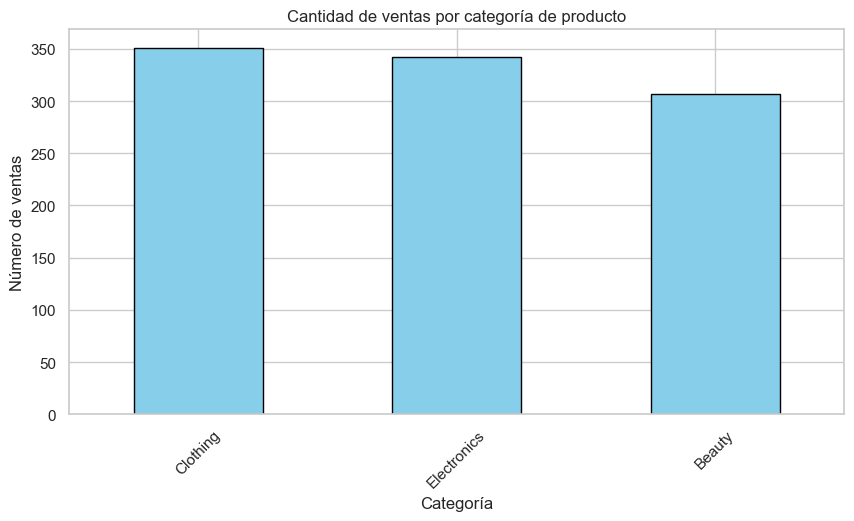

In [8]:
plt.figure(figsize=(10,5))
df['categoria_producto'].value_counts().plot(kind='bar', color='skyblue', edgecolor='black')
plt.title("Cantidad de ventas por categoría de producto")
plt.xlabel("Categoría")
plt.ylabel("Número de ventas")
plt.xticks(rotation=45)
plt.show()


## 6. Análisis temporal: Ventas por mes

Usamos la columna `nombre_mes` que fue creada en la etapa de transformaciones.

Este tipo de análisis temporal también fue revisado en clase.


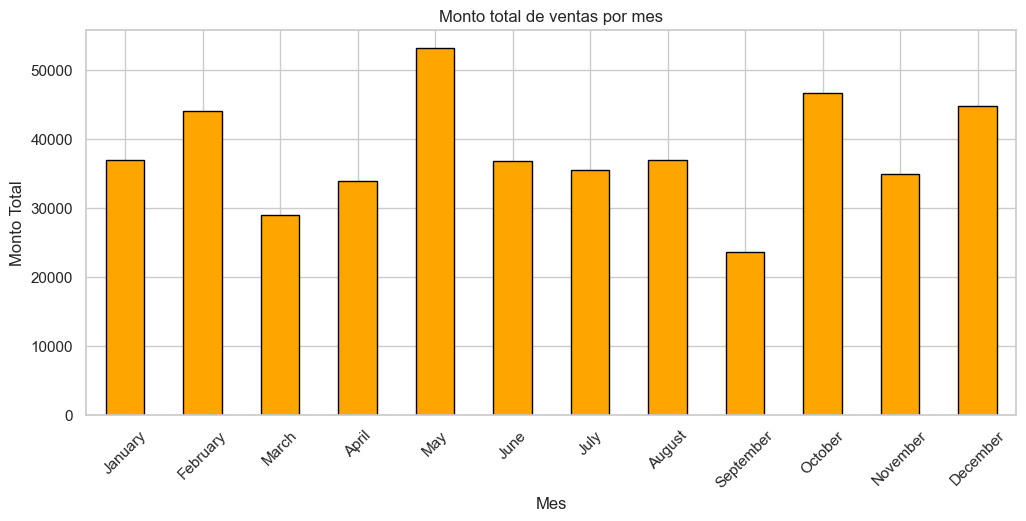

In [9]:
ventas_mes = df.groupby('nombre_mes')['monto_total'].sum().reindex([
    'January','February','March','April','May','June','July',
    'August','September','October','November','December'
])

plt.figure(figsize=(12,5))
ventas_mes.plot(kind='bar', color='orange', edgecolor='black')
plt.title("Monto total de ventas por mes")
plt.ylabel("Monto Total")
plt.xlabel("Mes")
plt.xticks(rotation=45)
plt.show()


## 7. Matriz de correlación

La correlación permite identificar relaciones entre variables numéricas.

En el archivo EDA01.ipynb se aplicó este mismo análisis.


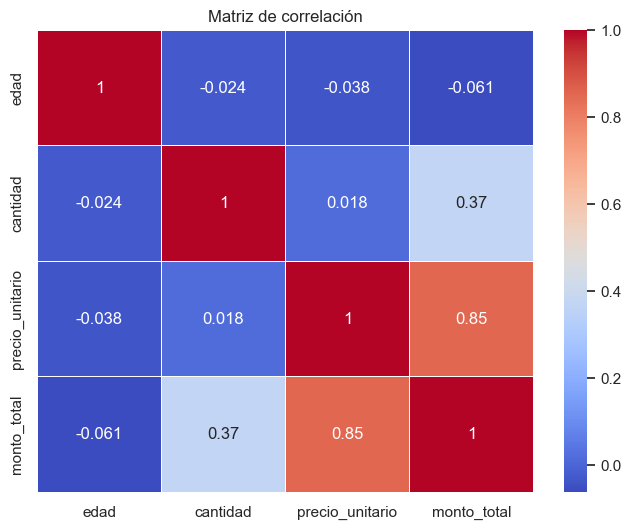

In [10]:
plt.figure(figsize=(8,6))
sns.heatmap(df[['edad','cantidad','precio_unitario','monto_total']].corr(),
            annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Matriz de correlación")
plt.show()


## 8. Análisis por rango de edad

Usamos la columna `rango_edad` creada en transformaciones.

Esto permite saber qué segmento de clientes compra más.


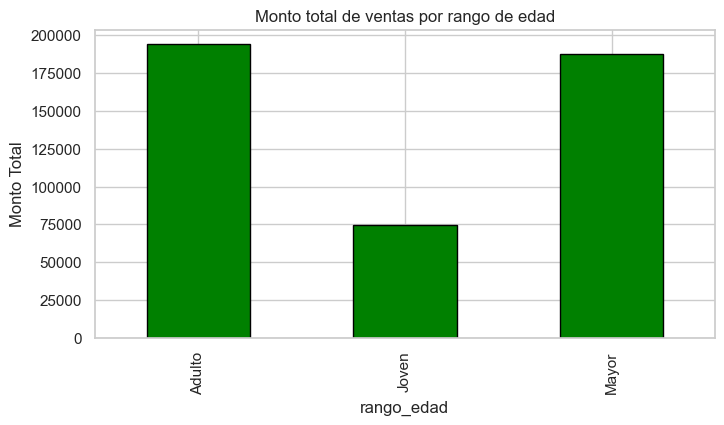

In [11]:
df.groupby('rango_edad')['monto_total'].sum().plot(
    kind='bar',
    figsize=(8,4),
    color='green',
    edgecolor='black'
)

plt.title("Monto total de ventas por rango de edad")
plt.ylabel("Monto Total")
plt.show()


#  Conclusiones generales del EDA

El análisis exploratorio del dataset Retail Sales revela varios puntos importantes:

###  Patrones relevantes
- La distribución de montos totales muestra alta variación con algunas compras grandes.
- La categoría más comprada es *Clothing* seguida por *Electronics*.
- Los meses con mayor venta corresponden a mediados y finales de año.

###  Clientes
- Los clientes “Adultos” representan el mayor volumen de compra.
- No existe una correlación fuerte entre edad y monto gastado.

###  Comportamiento de las ventas
- Los histogramas muestran distribuciones sesgadas hacia la derecha.
- Los boxplots revelan valores altos (outliers) en `monto_total`.

###  Preparación para Machine Learning
Este EDA confirma que:
- Los datos están listos para modelos supervisados y no supervisados.
- Se usarán variables normalizadas para los modelos en las etapas 2.6 y 2.7.

Este EDA replica la metodología del archivo **EDA01.ipynb** visto en clase,  
pero adaptado completamente al **Retail Sales Dataset**.
